# Select pulsar candidatess

In [1]:
%matplotlib inline
from importlib import reload
import glob

In [2]:
pointlike_dir='/nfs/farm/g/glast/g/catalog/pointlike'
model_name='uw9011'
model_dir=f'{pointlike_dir}/skymodels/P8_10years/{model_name}'
f = f'{model_dir}/plots/pulsars/pulsar_candidates.csv'
assert os.path.exists(f), f'File{f} not found'
df = pd.read_csv(f, index_col=0);

<b>Select entries above 15 deg, and not close to a LAT pulsar

In [3]:
dfa = df[(np.abs(df.glat)>15) & (df.otherid.apply(lambda s: ~s.startswith('PSR')))]; dfa.head()

,ra,dec,ts,glat,pindex,curvature,locqual,distance,otherid,otherts
name,,,,,,,,,,
S8008-1189,200.100814,-45.099192,133.320078,17.471328,2.687155,0.392772,1.05,0.882114,504H-0194,35.709373
P88Y6341,349.658424,-38.464663,98.245240,-67.538137,2.109588,0.312556,0.32,2.510149,P88Y6367,968.372375
998N-0517,79.347135,-69.575736,95.651460,-33.450901,2.101448,0.263470,1.28,0.654994,P88Y1250,26.783363
P88Y5985,324.551780,-49.589217,78.230547,-46.965083,2.863538,0.513662,0.32,0.689456,P88Y5978,836.149719
504P-1095,287.784899,-32.361436,73.642471,-17.975764,2.376879,0.258716,0.54,1.413903,P88Y5332,55.389645


In [4]:
entry = dfa.iloc[0]
sname, ra,dec = entry.name, entry.ra, entry.dec

In [5]:
from astropy.coordinates import SkyCoord
s = SkyCoord(ra,dec, unit='deg', frame='fk5').transform_to('galactic')
l,b = s.l.value, s.b.value

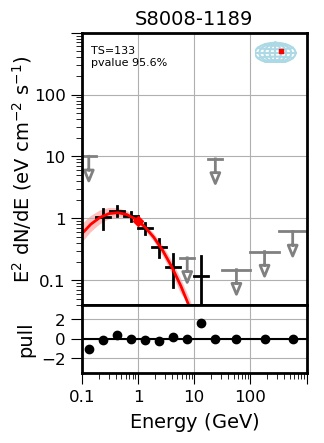

In [6]:
from IPython.display import Image
Image(f'{model_dir}/sedfig/{sname}_sed_{model_name}.jpg', width=200, height=300)

In [7]:
import main
tdata = main.Main(name=sname, position=(l,b), interval=5, mjd_range=None,        
                 weight_file=None) #'/nfs/farm/g/glast/g/catalog/pointlike/curr/uw9011/504N-0010_weights.pkl')
lcp = tdata.light_curve( rep='poisson', min_exp=0.1) 

Source S8008-1189 at: (l,b)=(308.284,17.471); ROI radius=5
Loading data from 127 months 
	Selected 357225 photons within 5 deg of  (308.28,17.47)
	Dates: 2008-08-04 17:31 - 2018-08-01 19:41
	MJD  : 54682.7          - 58331.8         
Default binning: 730 intervals of 5 days, in range (54683.0, 58332.0)
Loaded 722 / 730 cells with exposure > 0.1 for light curve analysis
<class 'light_curve.LightCurve'>, <class 'light_curve.PoissonRep'> fail for Index 0, LogLike light_curve.LogLike: time 54685.499, 0 weights,  exposure 0.75, S 0, B 0
   unsupported operand type(s) for +: 'int' and 'list'
Fits using representation poisson: 722 intervals


In [17]:
d=tdata.data
d.photon_data

,band,time,pixel,radius
0,0,54682.730239,4842962,4.902746
1,4,54682.863961,4228528,1.703230
2,5,54682.864830,4756912,3.353552
3,1,54682.937470,4494714,4.914208
4,6,54682.938574,4187583,2.303699
...,...,...,...,...
357220,1,58331.814213,4695445,3.752509
357221,3,58331.814661,4298168,1.078699
357222,0,58331.815327,4289966,1.188066
357223,9,58331.816589,4523494,4.428297
